# Import Data

In [1]:
import pandas as pd
import numpy as np

cereal = pd.read_csv("http://fengmai.net/download/data/bia652/cereal.csv", sep=" ")
names = cereal["name"].values
cereal = cereal.drop(["name","mfr","type"],1)
cereal.describe()

/var/folders/16/sj7htwpn37x5chbjt67h8nrr0000gn/T/ipykernel_29494/1615142925.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  cereal = cereal.drop(["name","mfr","type"],1)


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [2]:
cereal.shape

(77, 13)

In [3]:
cereal.head(10) # we can see that there are missing values! (-1)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


- We replace missing values with the mean

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=-1, strategy='mean')
imputer = imputer.fit(cereal)
cereal[:] = imputer.transform(cereal)

In [5]:
cereal.head(10) # we can see that there are missing values! (-1)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.000000,25.0,3.0,1.00,0.33,68.402973
1,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.000000,0.0,3.0,1.00,1.00,33.983679
2,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.000000,25.0,3.0,1.00,0.33,59.425505
3,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.000000,25.0,3.0,1.00,0.50,93.704912
4,110.0,2.0,2.0,200.0,1.0,14.0,8.0,98.666667,25.0,3.0,1.00,0.75,34.384843
5,110.0,2.0,2.0,180.0,1.5,10.5,10.0,70.000000,25.0,1.0,1.00,0.75,29.509541
6,110.0,2.0,0.0,125.0,1.0,11.0,14.0,30.000000,25.0,2.0,1.00,1.00,33.174094
7,130.0,3.0,2.0,210.0,2.0,18.0,8.0,100.000000,25.0,3.0,1.33,0.75,37.038562
8,90.0,2.0,1.0,200.0,4.0,15.0,6.0,125.000000,25.0,1.0,1.00,0.67,49.120253
9,90.0,3.0,0.0,210.0,5.0,13.0,5.0,190.000000,25.0,3.0,1.00,0.67,53.313813


In [6]:
# alternative method
for vals in cereal.columns:
    c = cereal[vals]
    avg = np.mean(c[c != -1])
    cereal[vals] = c.replace(-1, avg)

In [7]:
from sklearn.preprocessing import StandardScaler
cereal2 = StandardScaler(with_std=True).fit_transform(cereal) #standardize

In [8]:
pd.DataFrame(cereal2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.905397,1.337319,-0.012988,-0.356306,3.314439,-2.542013,-0.237495,2.627053,-0.14627,0.957813,-0.198067,-2.123870,1.844202
1,0.677623,0.417912,3.987349,-1.737087,-0.064172,-1.764055,0.225316,0.526376,-1.27255,0.957813,-0.198067,0.774053,-0.622110
2,-1.905397,1.337319,-0.012988,1.204578,2.892113,-2.023374,-0.468901,3.206550,-0.14627,0.957813,-0.198067,-2.123870,1.200922
3,-2.938605,1.337319,-1.013072,-0.236238,5.003745,-1.764055,-1.625929,3.351425,-0.14627,0.957813,-0.198067,-1.388576,3.657211
4,0.161019,-0.501495,0.987096,0.484170,-0.486498,-0.208138,0.225316,0.000000,-0.14627,0.957813,-0.198067,-0.307262,-0.593365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.161019,-0.501495,-0.012988,1.084510,-0.908824,1.607098,-0.931712,-0.560180,-0.14627,0.957813,-0.198067,-0.307262,-0.255058
73,0.161019,-1.420902,-0.012988,-0.236238,-0.908824,-0.467457,1.150938,-1.067240,-0.14627,-0.251230,-0.198067,0.774053,-1.068547
74,-0.355585,0.417912,-0.012988,0.844374,0.358155,0.569820,-0.931712,0.236628,-0.14627,-1.460273,-0.198067,-0.653283,0.510308
75,-0.355585,0.417912,-0.012988,0.484170,0.358155,0.569820,-0.931712,0.164191,-0.14627,-1.460273,-0.198067,0.774053,0.639627


# PCA

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver = 'full') #we initialize y with PCA. 
pca.fit(cereal2)
cereal_pca = pca.transform(cereal2)

In [10]:
pca.components_

array([[-0.32404614,  0.30228677, -0.05820288, -0.20202335,  0.43979331,
        -0.17250476, -0.24984494,  0.38353483, -0.13955809,  0.13477084,
        -0.07762869, -0.27889915,  0.45306478],
       [-0.36030025, -0.16454222, -0.3406324 , -0.12551331, -0.21729394,
         0.18632205, -0.34363832, -0.32766933, -0.16690193, -0.27523429,
        -0.43550776,  0.24278825,  0.2274098 ]])

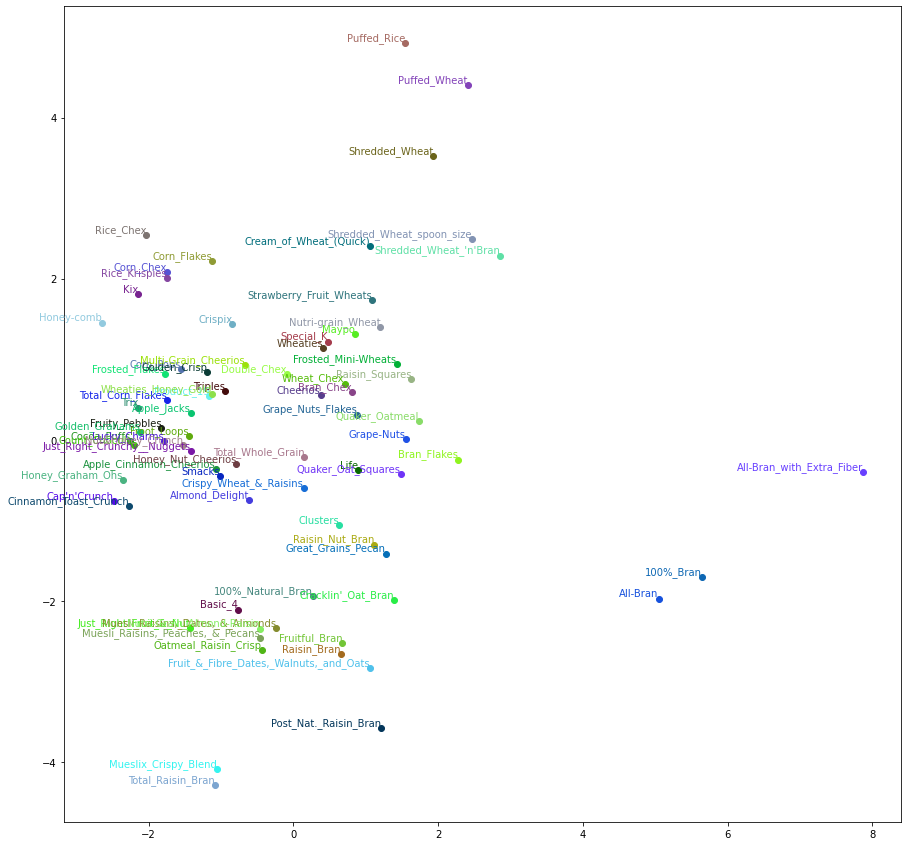

In [11]:
#generate 77 random colors, one for each cereal
import random
random.seed(123)
import matplotlib.pyplot as plt

color = ["#%06x" % random.randint(0, 0xAAAAAA) for i in range(0, cereal.shape[0])]
# image size
from pylab import rcParams #set figure size
rcParams['figure.figsize'] = 15, 15

#scatter plot
for x, y, c in zip(cereal_pca[:,0], cereal_pca[:,1], color):
    plt.scatter(x,y,color=c)
    
#labels
for label, x, y, c in zip(names, cereal_pca[:,0],cereal_pca[:,1], color):
    plt.annotate(label, xy = (x, y), xytext = (-0, 0),
        textcoords = 'offset points', ha = 'right', va = 'bottom', color=c)

# SVD

In [12]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, algorithm='arpack') #we initialize y with PCA. 
svd.fit(cereal2)
cereal_svd = svd.fit_transform(cereal2)

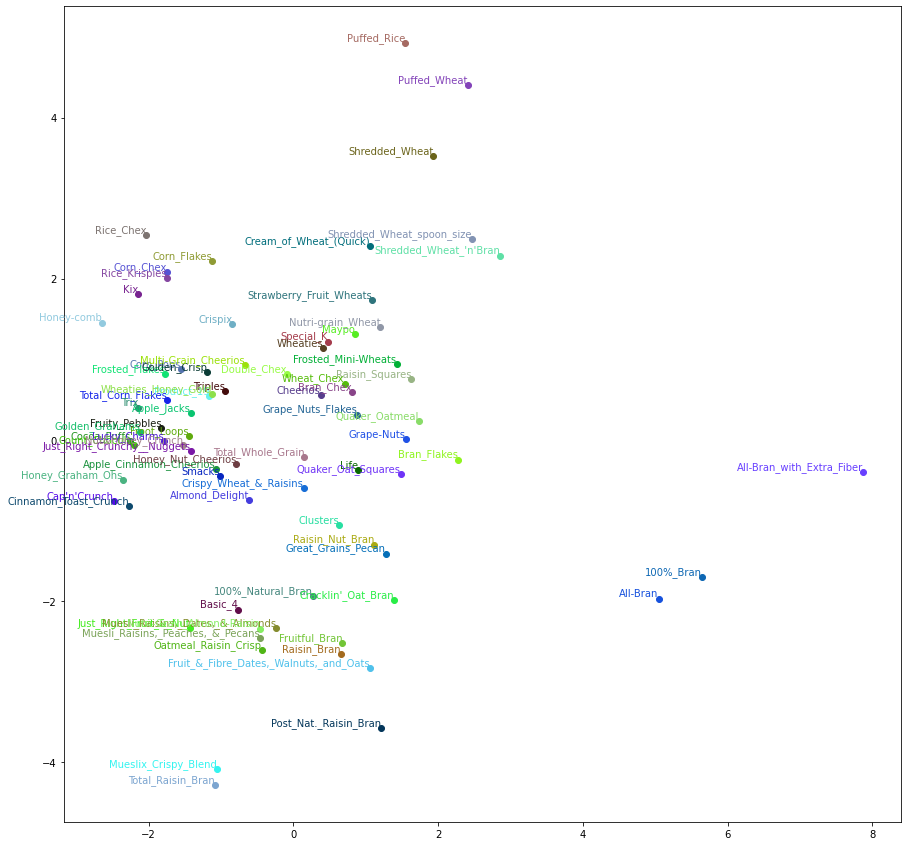

In [13]:
#scatter plot
for x, y, c in zip(cereal_svd[:,0], cereal_svd[:,1], color):
    plt.scatter(x,y,color=c)
    
#labels
for label, x, y, c in zip(names, cereal_svd[:,0],cereal_svd[:,1], color):
    plt.annotate(label, xy = (x, y), xytext = (-0, 0),
        textcoords = 'offset points', ha = 'right', va = 'bottom', color=c)

# Multidimensional Scaling

## Motivation
- In PCA, we project our $n\times k$ data matrix $X$ to $n\times l$. E.g., $l = 2,3$ can be used for visualization.
- This projection is linear, and is done to maximize the variation preserved.
- There is no guarantee that two data points (two rows of $X$) that are far away in the $k$ dimensional space get projected to be very close
- Can we preserve the distance in $k$-dimensional space after "projecting" to $l$-dimensions?

- E.g., we want the distance between any two points on the left to be similar to the corresponding distance on the right

| $k$-Dimensional  | $l$-Dimensional  |
|---|---|
| <img width="300px" src="http://fengmai.net/download/data/bia652/images/mds1.png"></img>  |  <img  width="300px" src="http://fengmai.net/download/data/bia652/images/mds2.png"></img>   |

- We can achieve this by minimizing the "stress"
- Let $d_{ij}=\|x_i-x_j\|$ be the distance between points $i$ and $j$ in $k$-D
- Let point $i,\ j$ be projected to $y_i,\ y_j$ in $l$-D
- We minimize

$$\text{stress} = \sum_{i\neq j} w_{\text{ij}} \left(\left\|y_i - y_j\right\| - d_{\text{ij}}\right){}^2$$

- Here $w_{ij}$ are the weights. E.g., if $w_{ij}=\frac{1}{d_{ij}^2}$, then

$$\text{stress} = \sum _{i\neq j} \left(\frac{\left\|y_i - y_j\right\|}{d_{\text{ij}}} - 1\right)^2,$$

- thus stress measures the relative difference between the actual edge length and ideal edge length.

## MDS

- set colors

In [14]:
from sklearn import manifold

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=123,
                   dissimilarity="euclidean", n_jobs=1)

cereal_mds = mds.fit(cereal2).embedding_

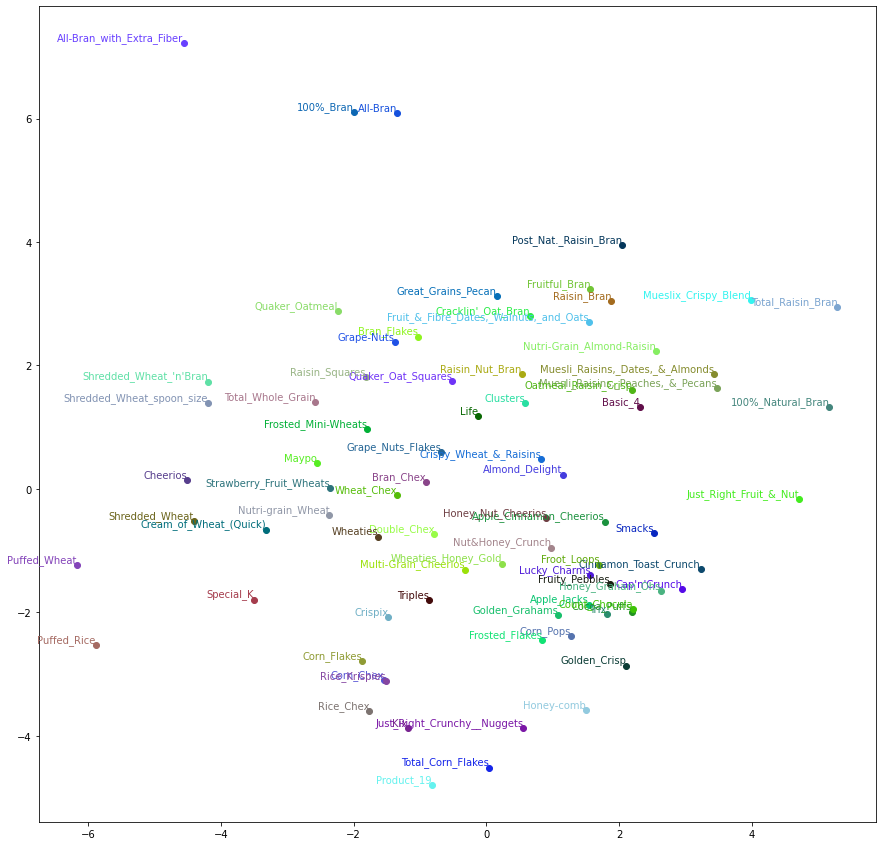

In [15]:
#scatter plot
for x, y, c in zip(cereal_mds[:,0], cereal_mds[:,1], color):
    plt.scatter(x,y,color=c)
    
#labels
for label, x, y, c in zip(names, cereal_mds[:,0],cereal_mds[:,1], color):
    plt.annotate(label, xy = (x, y), xytext = (-0, 0),
        textcoords = 'offset points', ha = 'right', va = 'bottom', color=c)

# SNE and T-SNE

- We can achieve a similar goal by first define the likelyhood of being "neighbors"
- We know the the closer two points are, the more likely they will be neighbors
- Let $P(j|i)$ defines the probablity of $j$ being a neighbor of $i$.
- In the original $k$-Dimensional space, this should be inverse proportional to $\|x_i - x_j\|$
- So we could set

$$P(j|i) = e^{-\frac{\|x_i-x_j\|}{2\sigma_i^2}}$$

- The above function is also called Gaussian or RBF kernel. $\sigma$ is a hyperparameter determined later.

- But we want that probability for all $j\ne i$ to sum to 1.
- So we normalize and redefine
$$p_{ij} = P(j|i) = \frac{e^{-\frac{\|x_i-x_j\|}{2\sigma_i^2}}}{\sum_{k\ne i} e^{-\frac{\|x_i-x_k\|}{2\sigma_i^2}}}$$
- The sequence $\{p_{ij}\ |\ j \ne i\}$ form a  probablity distribution.

- Now after "projecting" to the lower dimensional space, we can also define similarly the probability of $i$ and $j$ being neighbors

$$q_{ij} = \frac{e^{-\|y_i-y_j\|^2}}{\sum_{k\ne i} e^{-\|y_i-y_k\|^2}}$$

- Here we omitted the "$\sigma$", since they can be part of $y_i$.

- We want the two distribution to be similar. i.e., say $i=10$, and data points $1,\ 5,\ 12$ are close to $10$ so $p_{10,1},\ p_{10,5},\ p_{10,12}$ are relatively large compared with other points

- So we want find $y$ such that $q_{10,1},\ q_{10,5},\ q_{10,12}$ are also relatively large

- The standard way to measure the difference of two distributions is KL divergence

$$KL(p_i, q_i) = \sum_{k \ne i} p_{ij} log\frac{p_{ij}}{q_{ij}}$$

- This measures the distance between two distributions

- So we want to minimize $y_i$ such that  

$$C(y_1, y_2, \ldots, y_n) = \sum_i KL(p_i, q_i) = \sum_i \sum_{k \ne i} p_{ij} log\frac{p_{ij}}{q_{ij}}$$

- The objective is a nonlinear function of $y$.
- The way to minimize the objective function is via stochastic gradient descent
- The gradient of $C$ with regard to $y_i$ is 
$$\frac{\partial C}{\partial y_i} = 2\sum_j (y_i-y_j)(p_{ij} - q_{ij} + p_{ji} - q_{ji})$$

- Then $y_i = y_i - t \frac{\partial C}{y_i}$
- We will use sklearn TSNE package
- TSNE is similar to SNE, except that 
$q_{ij} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum_{k\ne l} (1 + \|y_l - y_k\|^2)^{-1} }$
- $(1 + \|y_i - y_j\|^2)^{-1}$ decays slower than $e^{-\|y_i-y_j\|}$ as distance increases, avoid some of the overcrowding problems with SNE.

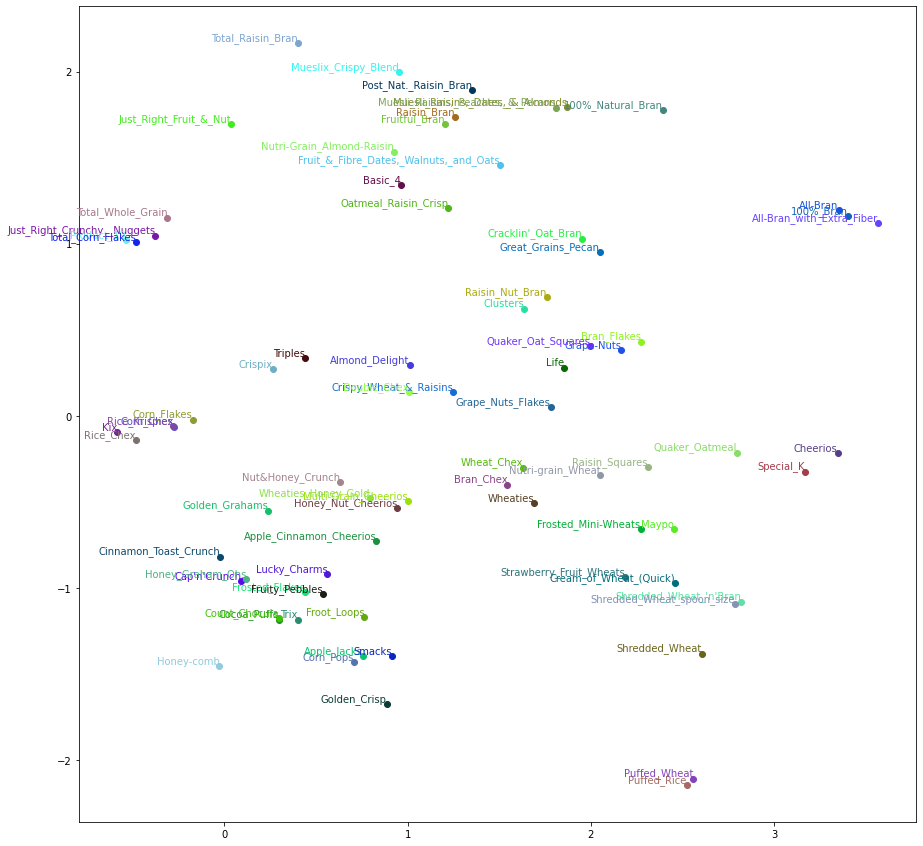

In [16]:
from sklearn.manifold import TSNE
# perplexity determines sigma
model = TSNE(n_components=2, random_state = 1, perplexity=50, method="exact", n_iter = 1000, learning_rate = 100)
cereal_tsne = model.fit_transform(cereal2) 

#scatter plot
for x, y, c in zip(cereal_tsne[:,0], cereal_tsne[:,1], color):
    plt.scatter(x,y,color=c)
#labels
for label, x, y, c in zip(names, cereal_tsne[:,0],cereal_tsne[:,1], color):
    plt.annotate(label, xy = (x, y), xytext = (-0, 0),
        textcoords = 'offset points', ha = 'right', va = 'bottom', color=c)

# Word2vec

<img width="200px" src="http://fengmai.net/download/data/bia652/images/text.gif" style="float: left; width: 45%; margin-right: 1%; margin-bottom: 0.5em;"></img><img width="200px" src="http://fengmai.net/download/data/bia652/images/text2vectors.png" style="float: right; width: 45%; margin-right: 1%; margin-bottom: 0.5em;">

- In text, each word is a categorical feature
- If your text uses a dictionary of size 100K, you have 100K features
- word2vec represent each word by a vector of dimension $k$
- reduce the dimensional from 100K to $k$
- It is a dimensional reduction applied to a sequence of co-occuring tokens (words)
- SVD/PCA can be slow with a large matrix ($O(p^2 n+p^3)$)
- How does it work? (Take BIA-667 or another DL/NLP course!)

## Python package
- Python: Gensim [models.word2vec](https://radimrehurek.com/gensim/intro.html)

In [17]:
import urllib.request
from pathlib import Path
response = urllib.request.urlopen('http://fengmai.net/download/data/bia652/documents.txt')
text_doc = response.read()
Path("documents.txt").write_text(str(text_doc))

34570370

In [18]:
Path('documents.txt').read_text()[:1000]

"b'Thank you sir. Ladies and gentlemen, at this time we will begin the question and answer session.   [Operator Instructions].   First question comes from James Wicklund with Banc of America Securities. Please go ahead.    Good morning, guys. Fabulous quarter.    Thanks, Jim.    The difference between your increase in revenues and increase in margins, is that third party or increased costs? Can you tell us what the actual day rate improvement was and what your cost increase was?    John, you want to handle that?    Sure, I think that it is in the tables, Jim, but     I\\'m sorry, I\\'m in San Francisco today. I came to listen to Marshall talk. I\\'m going to try to give religion.    $800 a day round numbers increase in revenue per day and about a $200 increase in cost per day     What was that cost that increased cost?    A combination of factors. As you know from the monthly rig reports, we experienced a fair amount of rain in the quarter, which means that you have crews sitting waiti

In [20]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

# train word2vec on your file
model0 = Word2Vec(LineSentence("documents.txt"), size=10, window=5, min_count=1, workers=2)

ModuleNotFoundError: No module named 'gensim'

- Look at a vector

In [21]:
model0['profit']

NameError: name 'model0' is not defined

- Find closest to a word

In [22]:
model0.most_similar('profit')

NameError: name 'model0' is not defined

Using word vectors:

1. As continuous features in linear/logistic regression
2. finding similarity of words or sentences. vector for a sentence = sum/mean of vectors for the words
